### Imports

In [1]:
import constants
import matplotlib.pyplot as plt
import numpy as np
from dted import Tile
import pandas as pd

### Load Data into Arrays

In [2]:
town_to_tiles = {
	constants.STEVENAGE : [["dted/UK/Stevenage/n51_w001_1arc_v3.dt2"]]
}

town_to_coordinates = {
	constants.STEVENAGE : [[-1, 0], [51, 52]]
}

cities = ['boston', 'london', 'merthyr', 'nottingham', 'scarhill', 'southampton', 'stevenage']

In [3]:
def get_dted(city_id, plot = 1):
	tiles = town_to_tiles.get(city_id)
	coordinates = town_to_coordinates.get(city_id)

	for i in range(len(tiles)):
		for j in range(len(tiles[0])):
			tiles[i][j] = Tile(tiles[i][j]).data

	for row in range(len(tiles)):
		tiles[row] = np.concatenate(tiles[row], axis = 0)

	elevations = []
	for i in range(len(tiles[0])):
		temp = []
		for j in range(len(tiles)):
			temp.append(tiles[len(tiles) - 1 - j][i])
		elevations.append(np.concatenate(temp, axis=0))


	lng = np.linspace(coordinates[0][0], coordinates[0][1], num = len(elevations), endpoint = False)
	lat = np.linspace(coordinates[1][0],coordinates[1][1], num = len(elevations[0]), endpoint = False)

	if plot == 1:
		# plot
		latMesh, lngMesh = np.meshgrid(lat, lng)
		fig, ax = plt.subplots(figsize=(3*(coordinates[0][1] - coordinates[0][0]), 4* (coordinates[1][1] - coordinates[1][0])))
		c = plt.pcolormesh(lngMesh, latMesh, np.array(elevations), shading = 'auto')
		fig.colorbar(c)
		plt.show()

	return lng, lat, elevations

In [4]:
def createBetterCSVs():
    
    for i in range(6,7):
        longitude, latitude, elevation = get_dted(i)
        print(f"City number: {i}")
        print(f"Latitude size: {len(latitude)}")
        print(f"Longitude size: {len(longitude)}")

        latitudeXL = []
        longitudeXL = []
        elevationXL = []

        for m in range(len(latitude)):
            for k in range(len(longitude)):
                latitudeXL.append(latitude[len(latitude) - 1 - m])

        for j in range(len(latitude)):
            for z in range(len(longitude)):
                longitudeXL.append(longitude[z])
                elevationXL.append(elevation[z][len(latitude) - 1 - j])

        df = pd.DataFrame()

        df['Latitude'] = latitudeXL
        df['Longitude'] = longitudeXL
        df['Elevation'] = elevationXL

        print(i)
        print(cities[i])
        df.to_csv(f"../data/elevationCSVs/{cities[i]}2.csv", index = False)

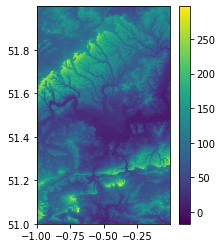

City number: 6
Latitude size: 3601
Longitude size: 1801
6
stevenage


In [5]:
createBetterCSVs()